In [1]:
import numpy as np
from sklearn.datasets import make_blobs,make_moons
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings(category=UserWarning,action='ignore')

In [2]:
##1.产生模拟数据
n_samples = 1000
n_clusters = 4

np.random.seed(0)
n_noise = int(0.1*n_samples)

##1.1 产生blob数据及噪音数据.
data1, y1 = make_blobs(n_samples=n_samples,centers=((-1, 1), (1, 1), (1, -1), (-1, -1)),n_features=2,random_state=40)
min1, min2 = np.min(data1, axis=0)
max1, max2 = np.max(data1, axis=0)
r = np.random.rand(n_noise, 2)
r[:, 0] = r[:, 0] * (max1-min1) + min1
r[:, 1] = r[:, 1] * (max2-min2) + min2
data1_noise = np.concatenate((data1, r), axis=0)
y1_noise = np.concatenate((y1, [4]*n_noise))

##1.2 产生月牙形数据及噪音数据.
data2, y2 = make_moons(n_samples=n_samples, noise=.05)
min1, min2 = np.min(data2, axis=0)
max1, max2 = np.max(data2, axis=0)
r = np.random.rand(n_noise, 2)
r[:, 0] = r[:, 0] * (max1 - min1) + min1
r[:, 1] = r[:, 1] * (max2 - min2) + min2
data2_noise = np.concatenate((data2, r), axis=0)
y2_noise = np.concatenate((y2, [2] * n_noise))

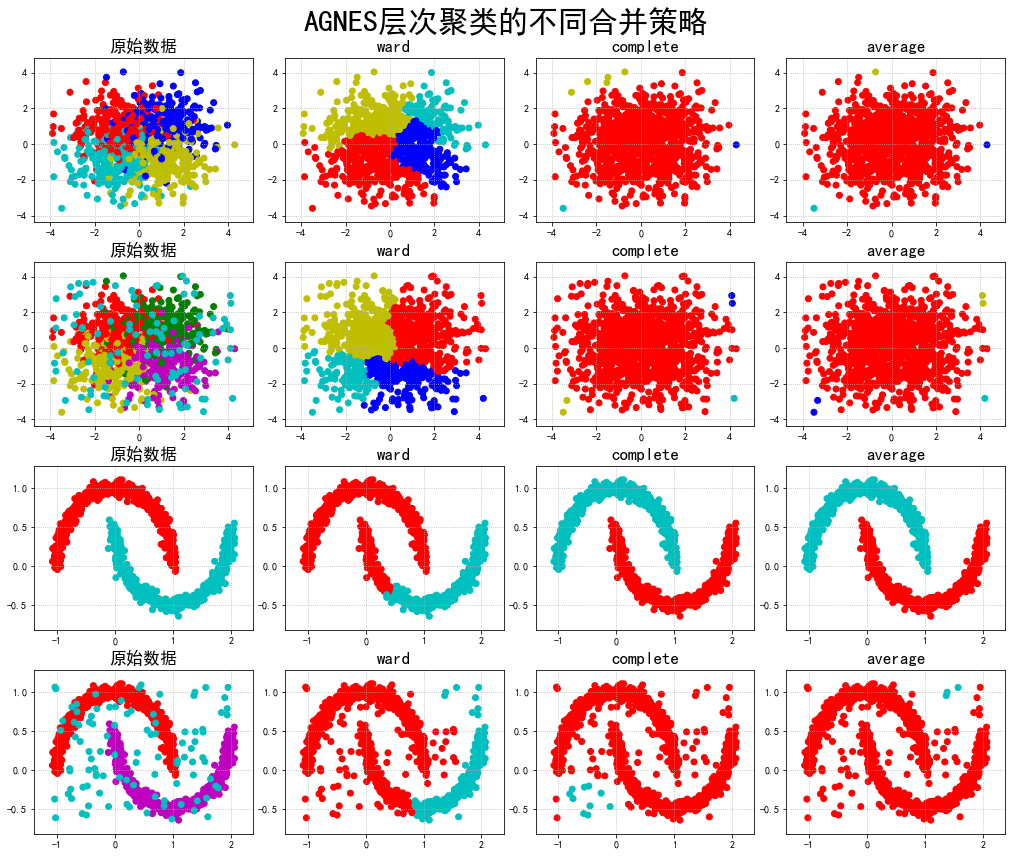

In [3]:
##2.模型构建与展示
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph

##设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

cm = mpl.colors.ListedColormap(list('rgbmyc'))
plt.figure(figsize=(14, 12))
linkages = ("ward", "complete", "average") #把几种距离方法，放到list里，后面直接循环取值
for index, (n_clusters, data, y) in enumerate(((4, data1, y1), (4, data1_noise, y1_noise),(2, data2, y2), (2, data2_noise, y2_noise))):
    # plt.subplot的前面的两个4表示4行4列共16张图，第三个参数表示第几个子图(从1开始，从左往右/从上往下)
    #每一行先画原始数据,然后依次是linkages对应的分类结果.
    plt.subplot(4, 4, 4*index+1)
    plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
    plt.title(u'原始数据', fontsize=17)
    plt.grid(linestyle=':')
    min1, min2 = np.min(data, axis=0)
    max1, max2 = np.max(data, axis=0)
    plt.xlim(expandBorder(min1, max1))
    plt.ylim(expandBorder(min2, max2))

    #计算类别与类别的距离(只计算最接近的七个样本的距离) -- 希望在agnes算法中，在计算过程中不需要重复性的计算点与点之间的距离
    connectivity = kneighbors_graph(data, n_neighbors=7, mode='distance', metric='minkowski', p=2, include_self=True)
    connectivity = (connectivity + connectivity.T)
    for i, linkage in enumerate(linkages):
        ##进行建模
        ac = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',connectivity=connectivity, linkage=linkage)
        ac.fit(data)
        y = ac.labels_
        
        plt.subplot(4, 4, 4*index+2+i)
        plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
        plt.title(linkage, fontsize=17)
        plt.grid(b=True, ls=':')
        plt.xlim(expandBorder(min1, max1))
        plt.ylim(expandBorder(min2, max2))

plt.suptitle(u'AGNES层次聚类的不同合并策略', fontsize=30)
plt.tight_layout(0.5, rect=(0, 0, 1, 0.95))
plt.show()